In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
from pathlib import Path
from dotenv import load_dotenv

load_dotenv()
pythonpath = str(Path(os.getenv("PYTHONPATH")))
sys.path.insert(0, pythonpath)

In [2]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import yaml
import joblib
import json
from pprint import pprint

# does not really work and / or make sense if 
from src.report.visualization import plot_confusion_matrix

# 1 Config

In [3]:
with open("../params.yaml", "r") as conf_file:
    config = yaml.safe_load(conf_file)

pprint(config)

{'base': {'log_level': 'INFO', 'random_stage': 42},
 'data_load': {'dataset_csv': 'C:/Users/mxmd/Desktop/dvc learning '
                              'projects/course-ds-base/data/raw/iris.csv'},
 'data_split': {'test_size': 0.2,
                'testset_path': 'C:/Users/mxmd/Desktop/dvc learning '
                                'projects/course-ds-base/data/processed/test_iris.csv',
                'trainset_path': 'C:/Users/mxmd/Desktop/dvc learning '
                                 'projects/course-ds-base/data/processed/train_iris.csv'},
 'evaluate': {'confusion_matrix_image': 'confusion_matrix.png',
              'metrics_file': 'metrics.json',
              'reports_dir': 'C:/Users/mxmd/Desktop/dvc learning '
                             'projects/course-ds-base/reports'},
 'featurize': {'features_path': 'C:/Users/mxmd/Desktop/dvc learning '
                                'projects/course-ds-base/data/processed/featured_iris.csv',
               'target_column': 'target'},
 't

In [4]:
!cat ../params.yaml

base:
  random_stage: 42
  log_level: INFO

data_load:
  dataset_csv: 'C:/Users/mxmd/Desktop/dvc learning projects/course-ds-base/data/raw/iris.csv'

featurize:
  features_path: 'C:/Users/mxmd/Desktop/dvc learning projects/course-ds-base/data/processed/featured_iris.csv'
  target_column: target

data_split:
  test_size: 0.2
  trainset_path: 'C:/Users/mxmd/Desktop/dvc learning projects/course-ds-base/data/processed/train_iris.csv'
  testset_path: 'C:/Users/mxmd/Desktop/dvc learning projects/course-ds-base/data/processed/test_iris.csv'

train:

  cv: 3
  estimator_name: logreg
  estimators:
    logreg: # sklearn.linear_model.LogisticRegression
      param_grid: # params of GridSearchCV constructor
        C: [0.001]
        max_iter: [100]
        solver: ['lbfgs']
        multi_class: ['multinomial']
    svm: # sklearn.svm.SVC
      param_grid:
        C: [0.1, 1.0]
        kernel: ['rbf', 'linear']
        gamma: ['scale']
        degree: [3, 5]
  model_path: 'C:/Users/mxmd/Desktop/dvc

# 2 Load dataset

In [6]:
# Get data 
from src.stages.data_load import data_load

data_load(config_path="../params.yaml")


2024-05-10 14:56:25,790 — DATA_LOAD — INFO — Get dataset
2024-05-10 14:56:25,797 — DATA_LOAD — INFO — Save raw data
Data load complete:    sepal_length  sepal_width  petal_length  petal_width  target
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0


In [7]:
!python ..\src\stages\data_load.py --config params.yaml


Traceback (most recent call last):
  File "c:\Users\mxmd\Desktop\dvc learning projects\course-ds-base\src\stages\data_load.py", line 4, in <module>
    import pandas as pd
ModuleNotFoundError: No module named 'pandas'


In [27]:
%%bash 

# Raw Iris dataset saved

ls ../data/raw

iris.csv


# 3 Features engineering

In [11]:
# Get data 
from src.stages.featurize import featurize

featurize(config_path="../params.yaml")

2024-05-10 14:10:18,207 — FEATURIZE — INFO — Load raw data
2024-05-10 14:10:18,219 — FEATURIZE — INFO — Extract features
2024-05-10 14:10:18,222 — FEATURIZE — INFO — Save features


In [ ]:
!python src/stages/featurize.py --config=params.yaml

In [ ]:
# Features.csv file has created

!ls data/processed

# 4 Split dataset

In [12]:
from src.stages.featurize import featurize

featurize(config_path="../params.yaml")

2024-05-10 14:10:48,342 — FEATURIZE — INFO — Load raw data
2024-05-10 14:10:48,344 — FEATURIZE — INFO — Extract features
2024-05-10 14:10:48,347 — FEATURIZE — INFO — Save features


In [ ]:
!python src/stages/data_split.py --config=params.yaml

In [ ]:
!ls data/processed/

# 5 Train

In [16]:
from src.stages.train import train_model

train_model(config_path="../params.yaml")

2024-05-10 14:12:32,209 — TRAIN — INFO — Get estimator name
2024-05-10 14:12:32,209 — TRAIN — INFO — Estimator: logreg
2024-05-10 14:12:32,210 — TRAIN — INFO — Load train dataset
2024-05-10 14:12:32,213 — TRAIN — INFO — Train model
Fitting 3 folds for each of 1 candidates, totalling 3 fits
2024-05-10 14:12:32,269 — TRAIN — INFO — Best score: 0.9916436781609196
2024-05-10 14:12:32,269 — TRAIN — INFO — Save model


In [ ]:
!python src/stages/train.py --config=params.yaml

In [ ]:
# model is created
!ls models/

# 6 Evaluate

2024-05-10 14:14:19,693 — EVALUATE — INFO — Load model
2024-05-10 14:14:19,701 — EVALUATE — INFO — Load test dataset
2024-05-10 14:14:19,708 — EVALUATE — INFO — Evaluate (build report)
2024-05-10 14:14:19,715 — EVALUATE — INFO — Save metrics
2024-05-10 14:14:19,718 — EVALUATE — INFO — F1 metrics file saved to : C:\Users\mxmd\Desktop\dvc learning projects\course-ds-base\reports\metrics.json
2024-05-10 14:14:19,719 — EVALUATE — INFO — Save confusion matrix
2024-05-10 14:14:19,880 — EVALUATE — INFO — Confusion matrix saved to : C:\Users\mxmd\Desktop\dvc learning projects\course-ds-base\reports\confusion_matrix.png


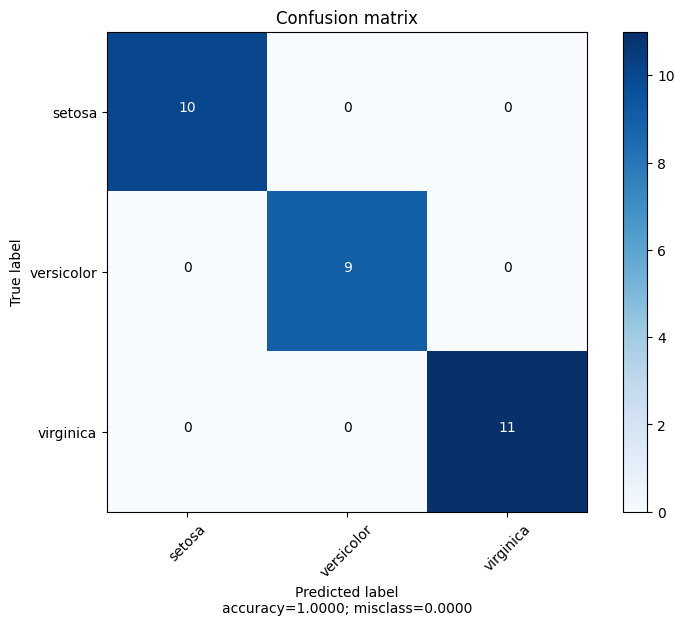

In [20]:
from src.stages.evaluate import evaluate_model

evaluate_model(config_path="../params.yaml")

In [25]:
!python ../src/stages/evaluate.py --config=params.yaml

Traceback (most recent call last):
  File "c:\Users\mxmd\Desktop\dvc learning projects\course-ds-base\src\stages\evaluate.py", line 6, in <module>
    import joblib
ModuleNotFoundError: No module named 'joblib'


In [22]:
!cat ../reports/metrics.json

{"f1_score": 1.0}


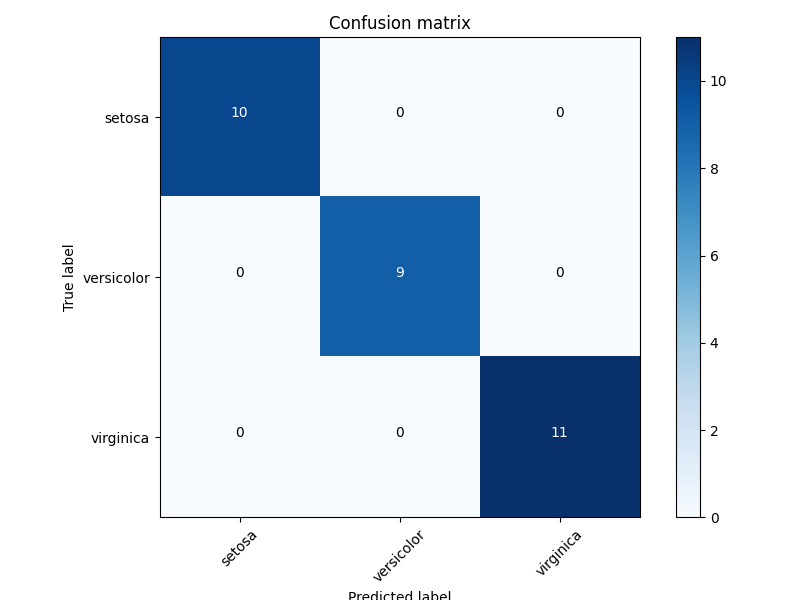

In [24]:
# Display confusion matrix

from IPython.display import Image
Image('../reports/confusion_matrix.png')